In [1]:
import numpy as np
import pandas as pd

In [20]:
df=pd.read_csv("KDDCup99.csv")

In [21]:
pd.set_option("display.max_columns", None)

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [23]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [24]:
df.shape

(494020, 42)

In [98]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [25]:
df.duplicated().sum()

348435

In [26]:
df.drop_duplicates(keep="first", inplace=True)

In [27]:
df.shape

(145585, 42)

In [102]:
df.nunique()

# 4 features are binary

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
lnum_compromised                  23
lroot_shell                        2
lsu_attempted                      3
lnum_root                         20
lnum_file_creations               18
lnum_shells                        3
lnum_access_files                  7
lnum_outbound_cmds                 1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [103]:
df.info()

# protocol_type, service, flag are string

<class 'pandas.core.frame.DataFrame'>
Index: 145585 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145585 non-null  int64  
 1   protocol_type                145585 non-null  object 
 2   service                      145585 non-null  object 
 3   flag                         145585 non-null  object 
 4   src_bytes                    145585 non-null  int64  
 5   dst_bytes                    145585 non-null  int64  
 6   land                         145585 non-null  int64  
 7   wrong_fragment               145585 non-null  int64  
 8   urgent                       145585 non-null  int64  
 9   hot                          145585 non-null  int64  
 10  num_failed_logins            145585 non-null  int64  
 11  logged_in                    145585 non-null  int64  
 12  lnum_compromised             145585 non-null  int64  
 13  lroo

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

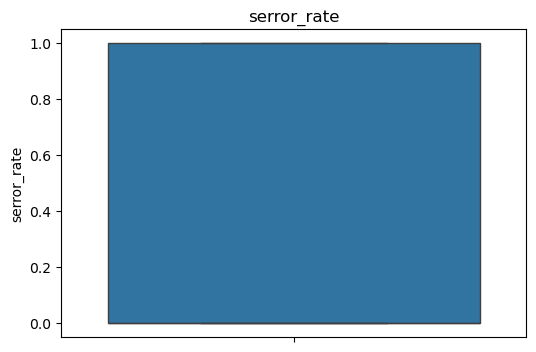

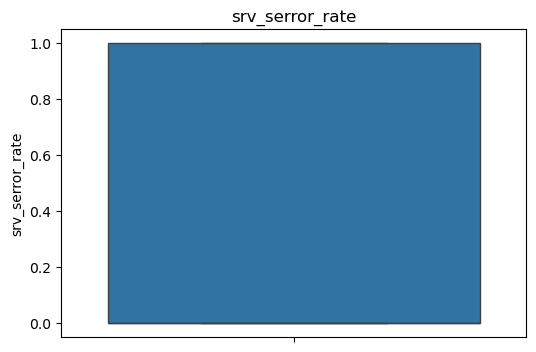

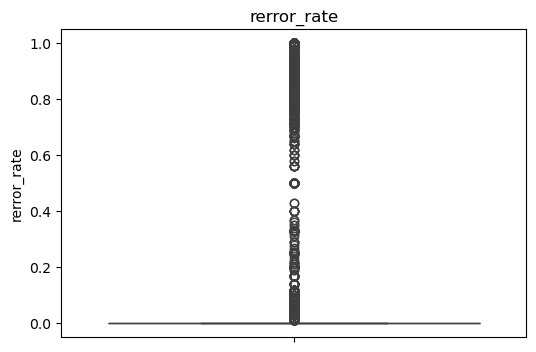

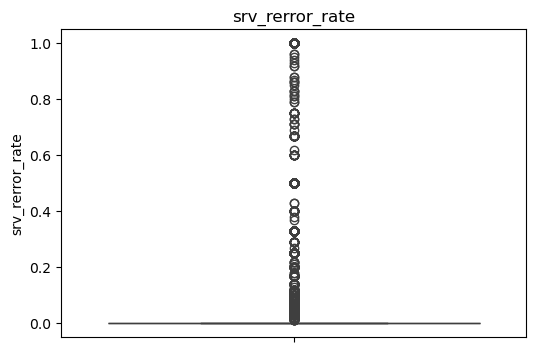

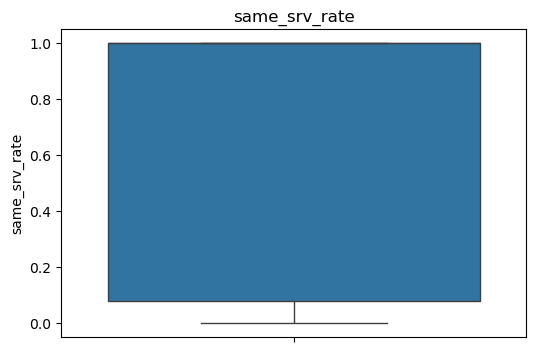

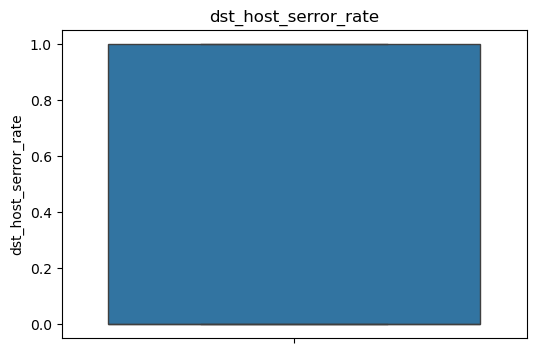

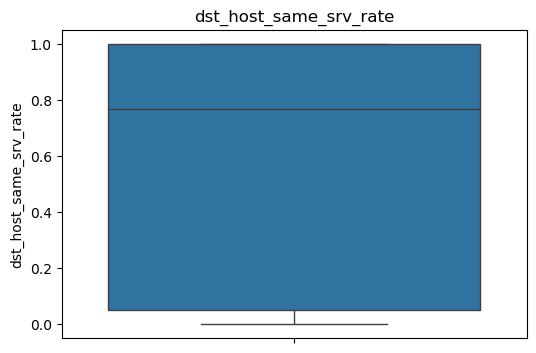

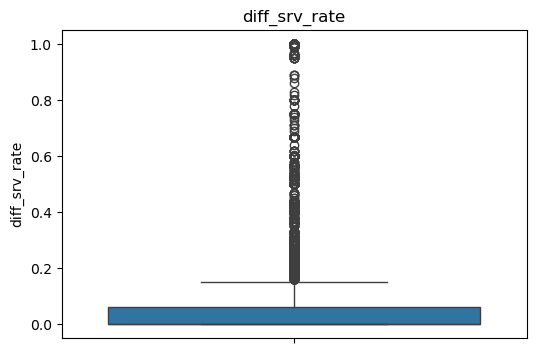

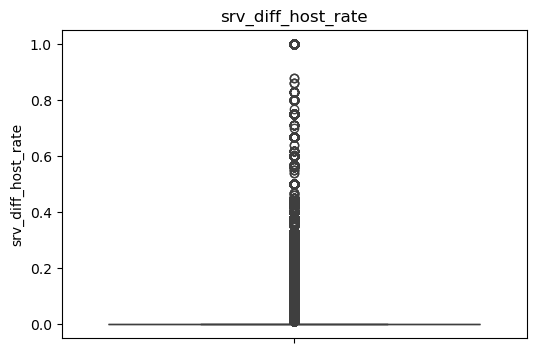

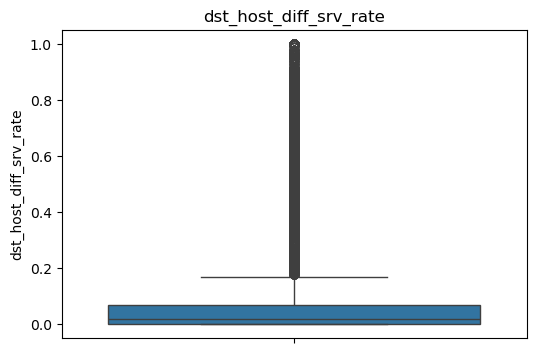

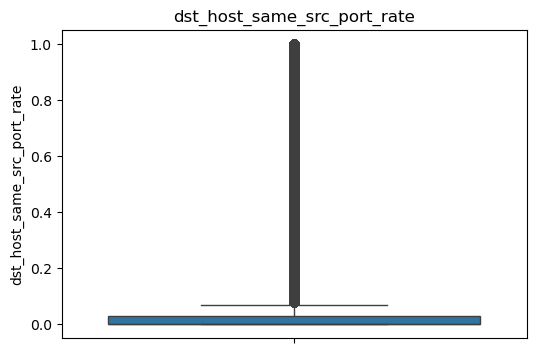

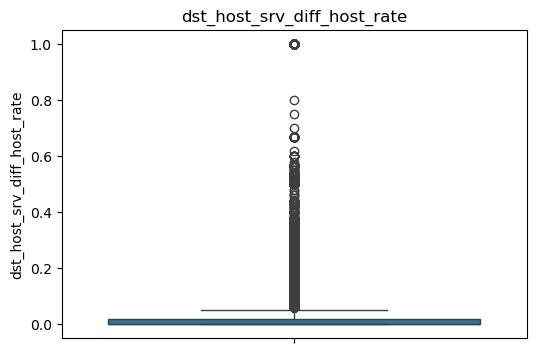

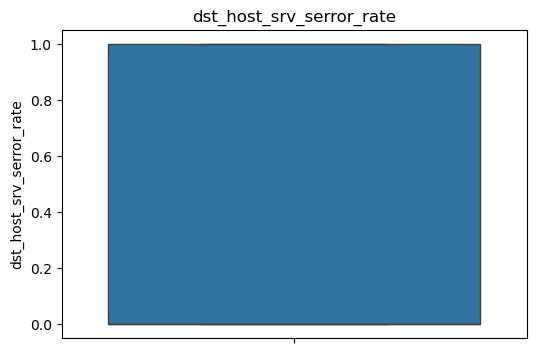

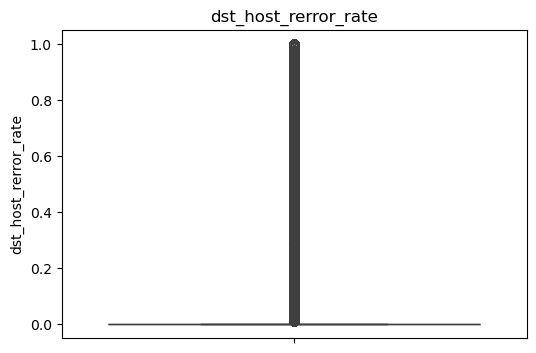

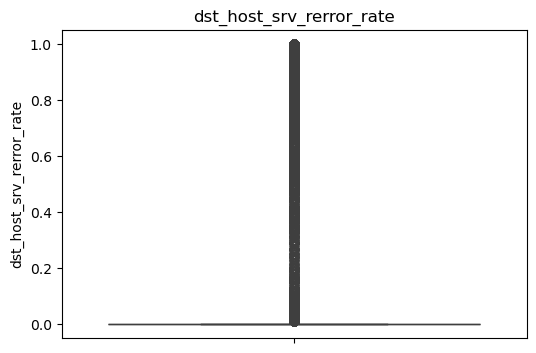

<Figure size 640x480 with 0 Axes>

In [65]:
# Plot with subplots
# fig, axes = plt.subplots(5, 3, figsize=(12, 6), sharey=True)

metrics = ["serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "dst_host_serror_rate", "dst_host_same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", 
          "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
          "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]
for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[metric])
    plt.title(metric)
    plt.show()


plt.tight_layout()
plt.show()


# having outliers: rerror_rate, srv_rerror_rate, diff_srv_rate, srv_diff_host_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, 
# dst_host_srv_diff_host_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate


# needs to deal with these outlier features

In [28]:
from sklearn.preprocessing import RobustScaler


# robust scaler on the columns having outliers


In [29]:
columns_to_scale = ["rerror_rate", "srv_rerror_rate", "diff_srv_rate", "srv_diff_host_rate", 
                    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
                    "dst_host_srv_diff_host_rate", "dst_host_rerror_rate", 
                    "dst_host_srv_rerror_rate"]

# Extract the columns for scaling
scaling = df[columns_to_scale]

# Initialize the scaler
scaler = RobustScaler()

# Perform the scaling
scaled_data = scaler.fit_transform(scaling)

# Convert the scaled data back to a DataFrame (optional, for better interpretability)
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

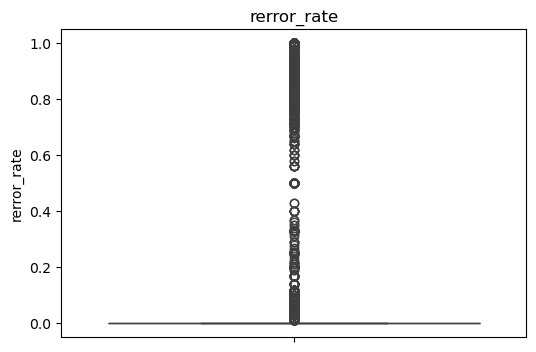

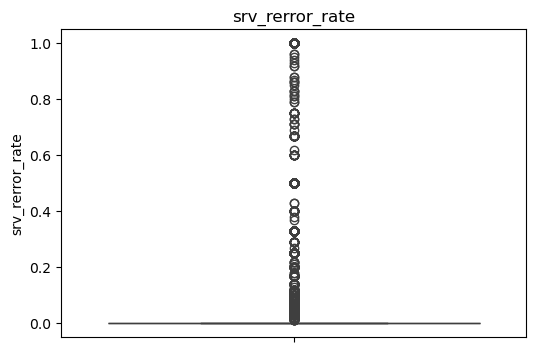

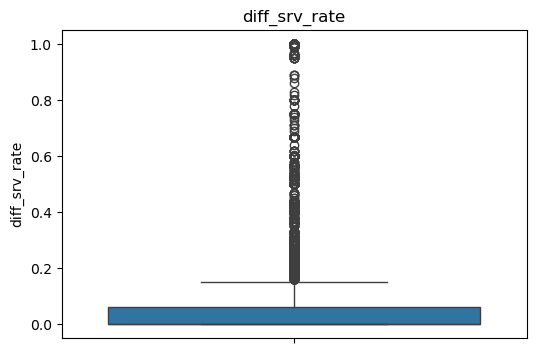

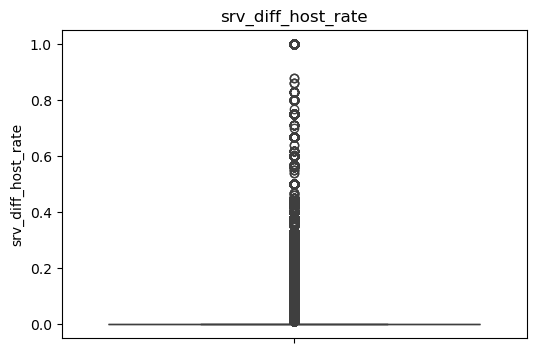

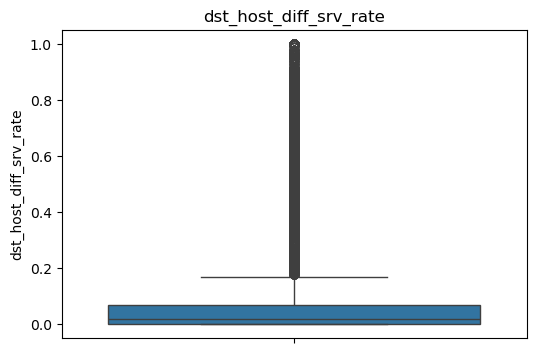

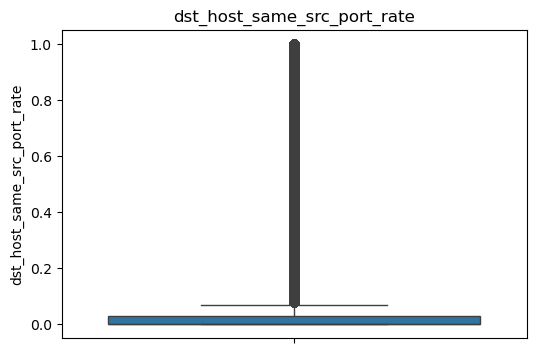

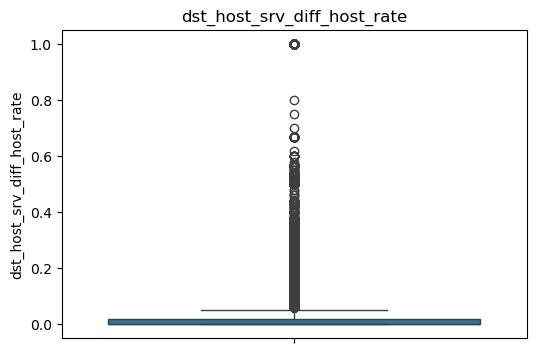

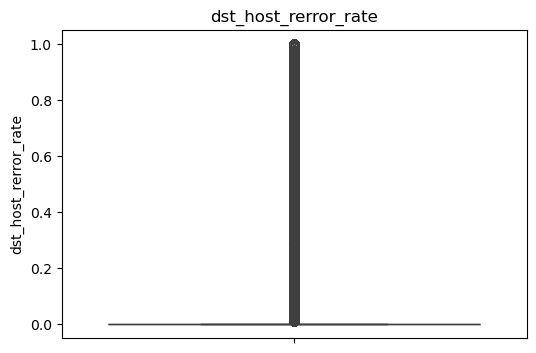

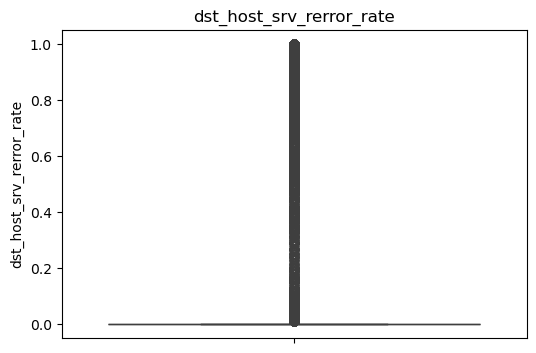

<Figure size 640x480 with 0 Axes>

In [68]:
for metric in scaled_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[metric])
    plt.title(metric)
    plt.show()


plt.tight_layout()
plt.show()


In [9]:
import scipy.stats as stats

In [10]:
numeric_features = df.select_dtypes(include=["number"])

for col in numeric_features.columns:
    print("min:",min(numeric_features[col]),"max:",max(numeric_features[col]), numeric_features[col].nunique())
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    sns.distplot(numeric_features[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(numeric_features[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()


# need transformation
# src_bytes: Yeo-Johnson (zero values)
# dst_bytes: Yeo-Johnson (- and zero values), outliers bhi h
# land: Yeo-Johnson (- and zero values), outliers bhi h
# wrong_fragment: Yeo-Johnson (- and zero values), outliers bhi h
# urgent: Yeo-Johnson (- and zero values), outliers bhi h
# host: Yeo-Johnson (- and zero values), outliers bhi h
# num_failed_logins: Yeo-Johnson (- and zero values), outliers bhi h
# num_compromised: Yeo-Johnson (- and zero values), outliers bhi h
# root_shell: Yeo-Johnson (- and zero values), outliers bhi h
# lsu_attempt: Yeo-Johnson (- and zero values), outliers bhi h
# lnum_root: Yeo-Johnson (- and zero values), outliers bhi h
# lnum_file_creation: Yeo-Johnson (- and zero values), outliers bhi h
# lnum_shells: Yeo-Johnson (- and zero values), outliers bhi h
# lnum_access_files: Yeo-Johnson (- and zero values), outliers bhi h
# is_guest_login: Yeo-Johnson (- and zero values), outliers bhi h
# count: Yeo-Johnson (- and zero values), outliers bhi h
# srv_count: Yeo-Johnson (- and zero values), outliers bhi h
# serror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# srv_serror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# rerror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# srv_rerror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# same_srv_rate: Yeo-Johnson (- and zero values), outliers bhi h
# diff_srv_rate: Yeo-Johnson (- and zero values), outliers bhi h
# srv_diff_host_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_count: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_srv_count: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_same_srv_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_diff_srv_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_same_src_port_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_srv_diff_host_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_serror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_srv_serror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_rerror_rate: Yeo-Johnson (- and zero values), outliers bhi h
# dst_host_srv_rerror_rate: Yeo-Johnson
# 


min: 0 max: 58329 2495


NameError: name 'plt' is not defined

In [105]:
df["protocol_type"].value_counts()

# one hot encoding will work fine here

protocol_type
tcp     130912
udp      12267
icmp      2406
Name: count, dtype: int64

In [106]:
df["service"].value_counts()


# way more nuniques need to reduce then one hot encoding

service
http        62053
private     49057
smtp         9721
domain_u     5425
other        4769
            ...  
X11            11
tim_i           5
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64

In [107]:
df["flag"].value_counts()

# one hot encoding

flag
SF        87458
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: count, dtype: int64

In [108]:
df["label"].value_counts()

# 24 features

label
normal             87831
neptune            51820
back                 968
teardrop             918
satan                906
warezclient          893
ipsweep              651
smurf                641
portsweep            416
pod                  206
nmap                 158
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  19
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [75]:
# Basic Features:
# duration: Length of connections (in seconds)
# protocol_type: Type of protocol(e.g. TCP, UDP, ICMP)
# service: Network service on the destination (e.g. HTTP, FTP, Telnet)
# flag: Status of connection (e.g. SF, REJ)
# sec_bytes: Number of bytes sent from source to destination
# dst_bytes: Number of bytes sent from destination to source
# land: Binary flag (1 if source and destination IP/port are the same, otherwise 0)
# wrong_fragment: Number of checksum fragment
# urgent: Number of packets in the connection marked as "urgent"

In [76]:
# Content Features: 
# hot: no. of "indicators" (e.g. directory access, file creations)
# num_failed_logins: no. of failed login attempts
# logged_in: Binary flag (1 if logged in successfully, otherwise 0)
# lnum_compromised: no. of compromised conditions
# lroot_shell: Binary flag (1 if a root shell is obtained, otherwise 0)
# lsu_attempted: no. of "su root" commands attempted
# lnum_root: no. of root accesses
# lnum_file_creations: no. of file creation operations
# lnum_shells: no. of shell prompts invoked
# lnum_access_files: number of file access operations
# lnum_outbound_cmds: no. of outbound commands in an FTP sessions
# is_host_login: Binary flag (1 if the login is from the host itself, otherwise 0)
# is_guest_login: Binary flag (1 if the login is a guest login, otherwise 0)

In [77]:
# Traffic features: Statistical features over a time window
# count: No of connections to the same host in the last 2 seconds
# srv_count: No of connections to the same service in the last 2 seconds
# serror_rate: percentage of connections that have SYN errors
# srv_serror_rate: percentage of connections to the same service with SYN errors
# rerror_rate: percentage of connections that have REJ errors
# srv_rerror_rate: percentage of connections to the same service with REJ errors
# same_srv_rate: percentage of connections to the same service
# diff_srv_rate: percentage of connections to the different service
# srv_diff_host_rate: percentage of connections to different hosts

In [78]:
# Host based traffic features:
# dst_host_count: No of connections to the same destination host
# dst_host_srv_count: no of connections to the same service on the destination host
# dst_host_same_srv_rate: percentage of connections to the same service on the destination host
# dst_host_diff_srv_rate: percentage of connections to different service on the s=destination host
# dst_host_same_src_port_rate: percentage of connections from the same source port
# dst_host_srv_diff_host_rate: percentage of connections to different hosts woth the same service
# dst_host_rerror_rate: percentage of connections to the destination with REJ errors
# dst_host_srv_rerror_rate: percentage of connections to the same service with REJ errors

In [79]:
# target labels:
# label: indicates whether the connections is "normal" or belongs to one of the attack categories (e.g. DoS, Probe, U2R, R2L)

In [33]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}  

df["attacks_type"]=df["label"].map(attacks_types)


In [34]:
df["attacks_type"].value_counts()

attacks_type
normal    87831
dos       54572
probe      2131
r2l         999
u2r          52
Name: count, dtype: int64

In [111]:
df.shape

(145585, 43)

In [83]:
from ydata_profiling import ProfileReport

In [84]:
profile = ProfileReport(df.sample(494), title="Profiling Report")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


In [35]:
X = df.drop(columns=["attacks_type", "label"])  # Drop target and label from features
y = df["attacks_type"] 

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
categorical_columns = ["protocol_type", "flag", "service"]
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")


In [39]:
X_categorical = ohe.fit_transform(X[categorical_columns])


In [40]:
X_remaining = X.drop(columns=categorical_columns)
X_transformed = np.concatenate((X_remaining.values, X_categorical), axis=1)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(116468, 118)
(29117, 118)
(116468,)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [45]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred1 = DT.predict(X_test)


In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))


Accuracy: 0.9990727066662087

Classification Report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     10929
      normal       1.00      1.00      1.00     17584
       probe       0.99      0.98      0.99       439
         r2l       0.96      0.96      0.96       161
         u2r       0.33      0.75      0.46         4

    accuracy                           1.00     29117
   macro avg       0.86      0.94      0.88     29117
weighted avg       1.00      1.00      1.00     29117



In [48]:
from sklearn.metrics import f1_score

In [49]:
f1 = f1_score(y_test, y_pred1, average=None)
print("F1 Score:", f1)

F1 Score: [0.99995425 0.99937436 0.98742857 0.95975232 0.46153846]


In [50]:
NB=GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred2=NB.predict(X_test)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))


Accuracy: 0.6816979771267644

Classification Report:
               precision    recall  f1-score   support

         dos       0.55      0.98      0.71     10929
      normal       0.97      0.52      0.68     17584
       probe       0.07      0.04      0.05       439
         r2l       0.22      0.05      0.08       161
         u2r       0.02      0.75      0.05         4

    accuracy                           0.68     29117
   macro avg       0.37      0.47      0.31     29117
weighted avg       0.80      0.68      0.67     29117



In [53]:
f1 = f1_score(y_test, y_pred2, average=None)
print("F1 Score:", f1)

F1 Score: [0.70811186 0.67535167 0.04769001 0.08080808 0.04511278]


In [54]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred3=KNN.predict(X_test)

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))


Accuracy: 0.9962908266648349

Classification Report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     10929
      normal       1.00      1.00      1.00     17584
       probe       0.97      0.86      0.92       439
         r2l       0.96      0.97      0.96       161
         u2r       1.00      0.25      0.40         4

    accuracy                           1.00     29117
   macro avg       0.98      0.82      0.85     29117
weighted avg       1.00      1.00      1.00     29117



In [57]:
f1 = f1_score(y_test, y_pred3, average=None)
print("F1 Score:", f1)

F1 Score: [0.99721245 0.99801102 0.91545894 0.96296296 0.4       ]


In [59]:
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred4 = RF.predict(X_test)


In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("\nClassification Report:\n", classification_report(y_test, y_pred4))


Accuracy: 0.9995535254318783

Classification Report:
               precision    recall  f1-score   support

         dos       1.00      1.00      1.00     10929
      normal       1.00      1.00      1.00     17584
       probe       1.00      0.99      0.99       439
         r2l       0.99      0.98      0.98       161
         u2r       1.00      0.75      0.86         4

    accuracy                           1.00     29117
   macro avg       1.00      0.94      0.97     29117
weighted avg       1.00      1.00      1.00     29117



In [64]:
f1 = f1_score(y_test, y_pred4, average=None)
print("F1 Score:", f1)

F1 Score: [1.         0.9996304  0.992      0.98442368 0.85714286]
